In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas as pd
import keras.utils as image

path = "/content/drive/MyDrive/3D Conformer/Multi-Label Representation of Adverse Covid Drug Reactions.csv"
import csv
import pandas as pd
df = pd.read_csv(path)
df

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import img_to_array
df['PubChem_ID'] = df['PubChem_ID'].apply(str)
df_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/MyDrive/3D Conformer/Conformer/'+df['PubChem_ID'][i]+'.png',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    df_image.append(img)
X = np.array(df_image)

In [ ]:
y = np.array(df.drop(['PubChem_ID'],axis=1))
y.shape

(17, 29)

In [ ]:
X.shape

(17, 128, 128, 3)

In [ ]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2,MobileNet
from tensorflow.keras.layers import AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
from keras.backend import sigmoid

In [ ]:
def Features(X_train, y_train, num_features):
    selected_features = np.random.choice([0, 1], size=num_features)
    return selected_features

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
loo.get_n_splits(X)

from sklearn.datasets import make_circles
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
import numpy as np

def main_accuracy_score(y_test, y_pred):
    # y_pred is a numpy array, y_test is a dataframe
    # to compare the two, convert to a single type
    y_test = y_test#.to_numpy()

    # shape of test and preds must be equal
    assert y_test.shape == y_pred.shape
    i=0

    scores = []

    # for each test sample
    while i < len(y_test):
        count=0
        # count the number of matches in the sample
        # y_test[i] -> row values in test set (true values)
        # y_pred[i] -> row values in predictions set (predicted values)
        for p, q in zip(y_test[i], y_pred[i]):
            if p == q:
                count += 1

        # accuracy score for the sample = no. of correctly predicted labels/total no. of labels
        scores.append(count / y_pred.shape[1])
        i+=1

    # final accuracy = avg. accuracy over all test samples =
    # sum of the accuracy of all training samples/no. of training samples
    return round((sum(scores)/len(y_test)), 4)



import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape

def create_cnn_model(num_classes):

  # Define the model
  model = Sequential()

  # Convolutional layers
  model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))
  #model.add(Conv2D(64, (3, 3), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))
  #model.add(Conv2D(128, (3, 3), activation='relu'))
  #model.add(MaxPooling2D(pool_size=(2, 2)))

  # Flatten the output from the previous layer
  model.add(Flatten())

  # LSTM layer
  model.add(Reshape((1, -1)))  # Add a reshape layer for LSTM
  model.add(LSTM(128))

  # Fully connected layers
  #model.add(Dense(512, activation='relu'))
  #model.add(Dense(256, activation='relu'))

  # Output layer with sigmoid activation for multi-label classification
  model.add(Dense(num_classes, activation='sigmoid'))

  # Compile the model
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model




num_selected_features = 3  # It refers to the number of features (or input channels); in this case, we use the RGB color channels.
num_classes=29 # Total Number of Adverse COVID Drug Reactions in the Database
model = create_cnn_model(num_classes)

stdma=[]
stdhl=[]
stdsa=[]
stdp=[]
stdr=[]
stdf=[]
stdroc=[]
y_predictedvalues=[]
y_predictedvalues1=[]
y_testedvalues=[]

model_history = []
i=1
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(X_train, X_test, y_train, y_test)
    selected_features = Features(X_train, y_train, num_selected_features)

    print("Training on Fold: ",i)
    i=i+1

    history_model = model.fit(X_train[:, :, :, selected_features], y_train, epochs=10, batch_size = 32, verbose=1)

    y_pred = model.predict(X_test[:, :, :, selected_features])
    y_pred1 = np.where(y_pred > 0.5, 1, 0)
    y_predictedvalues.append(y_pred)
    y_predictedvalues1.append(y_pred1)

    y_testedvalues.append(y_test)

Training on Fold:  1
Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.6929 - accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.5546 - accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 0.4386 - accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.3519 - accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.3007 - accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.2698 - accuracy: 0.0625
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.2495 - accuracy: 0.0625
Epoch 8/10
1/1 [==============================] - 4s 4s/step - loss: 0.2341 - accuracy: 0.0625
Epoch 9/10
1/1 [==============================] - 3s 3s/step - loss: 0.2222 - accuracy: 0.0000e+00
Epoch 10/10
1/1 [==============================] - 1s 530ms/step
Training on Fold:  2
Epoch 1/10
1/1

<ipython-input-10-c9294034f3c2>:41: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


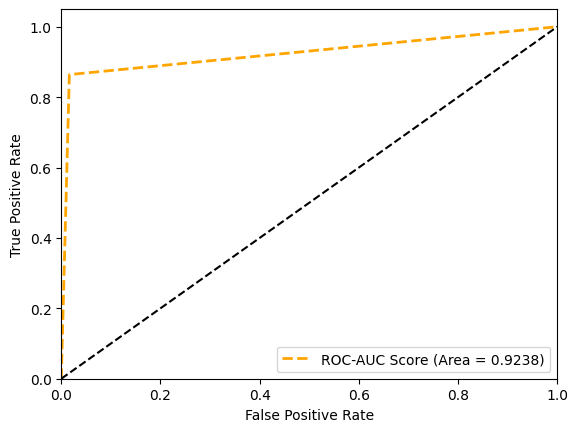

In [ ]:
store1=pd.DataFrame(np.concatenate(y_predictedvalues1))
side_effet_pred1=np.array(store1, dtype=int)

y_testedvaluesstore=pd.DataFrame(np.concatenate(y_testedvalues))
y_testedvaluesstore=np.array(y_testedvaluesstore, dtype=int)

y_testedvalues=pd.DataFrame(np.concatenate(y_testedvalues))
y_testedvalues.shape

n_classes = y.shape[1]
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

y_testtest=y_testedvaluesstore
yhat=side_effet_pred1

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testtest[:, i], yhat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_testtest.ravel(), yhat.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='ROC-AUC Score (Area = {0:0.4f})'
               ''.format(roc_auc["micro"]),
         color='orange', linestyle='--', linewidth=2)



plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import seaborn as sns
def plot(conf_matrix, labels):
    plot_count = 1
    fig = plt.figure(figsize=(20, 60))
    for _ in range(len(labels)//5):
        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

        plt.subplot(len(labels), 5, plot_count)
        sns.heatmap(conf_matrix[labels[plot_count-1]], annot=True, fmt='g')
        plt.title(f'{labels[plot_count-1]} Confusion Matrix')
        plot_count += 1

import numpy as np
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

IndexError: ignored

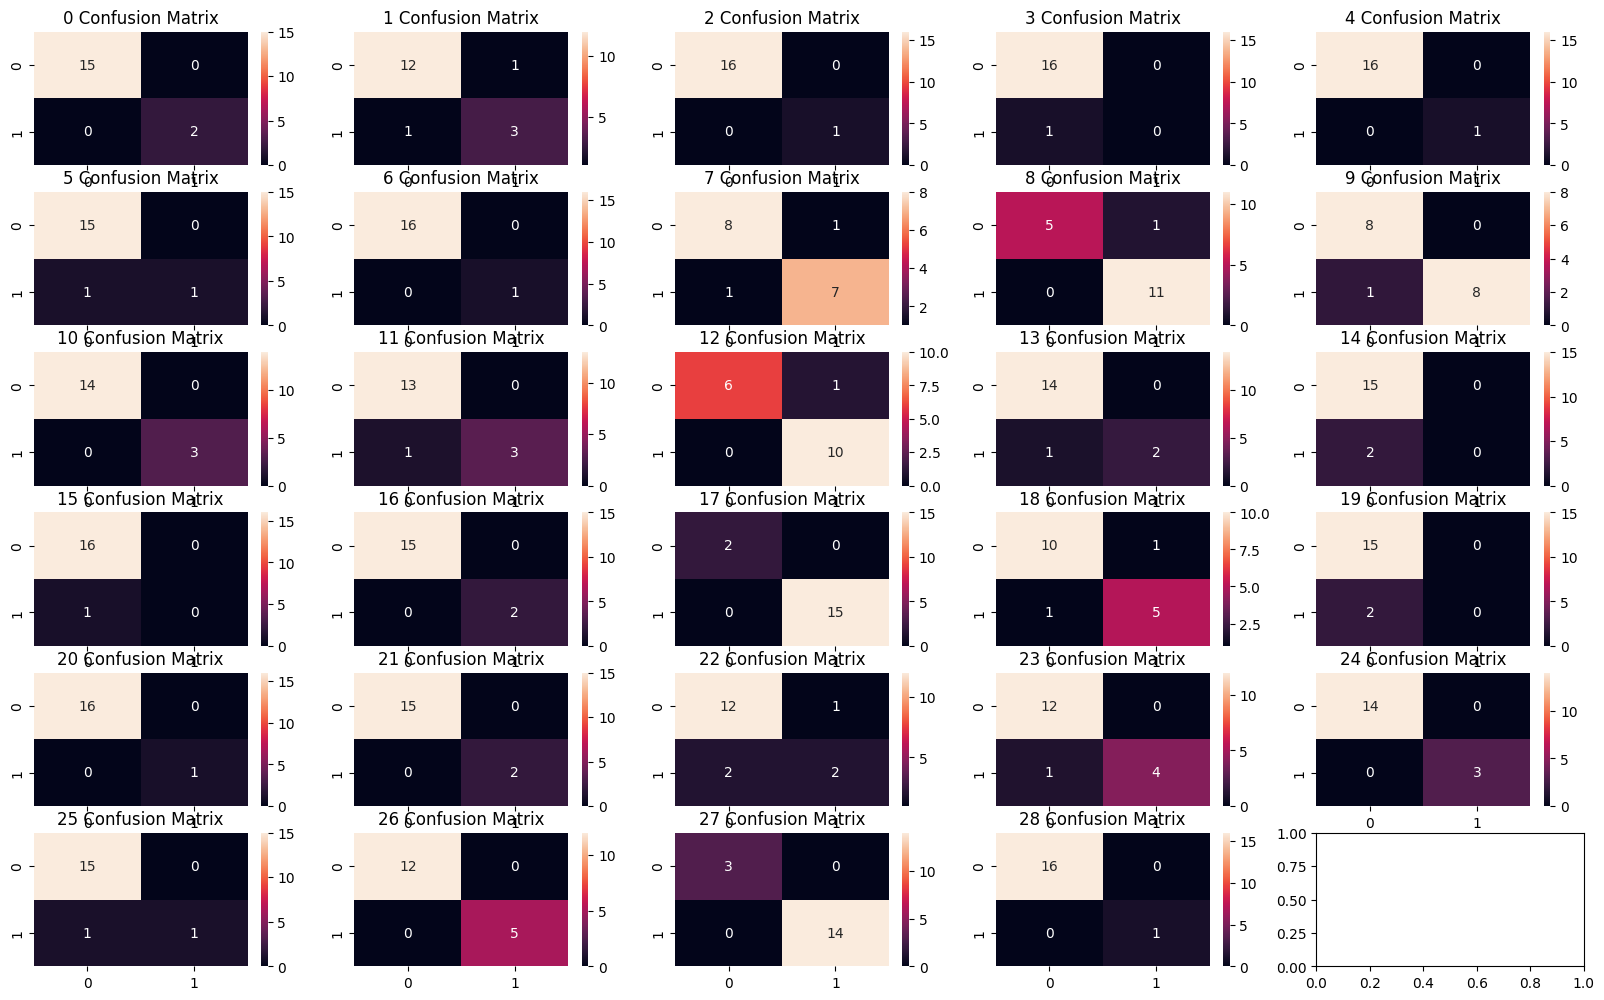

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix



y_true = y_testtest
y_pred = yhat

labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]

conf_mat_dict={}

for label_col in range(len(labels)):
    y_true_label = y_true[:, label_col]
    y_pred_label = y_pred[:, label_col]
    conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)

plot(conf_mat_dict, labels)
plt.savefig('DT-CM-without-MLSMOTE.pdf')
#fig1.savefig('RF-cm-without-MLsmote.png', dpi=100)
# for label matrix in conf_mat_dict.items():
#     print("Confusion matrix for label {}:".format(label))
#     print(matrix)

In [ ]:
print("accuracy",main_accuracy_score(y_true,y_pred))

accuracy 0.9533


In [ ]:
print("hamming loss", hamming_loss(y_true, y_pred))

hamming loss 0.04665314401622718


In [ ]:
print(classification_report(y_true,y_pred,digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         2
           1     0.7500    0.7500    0.7500         4
           2     1.0000    1.0000    1.0000         1
           3     0.0000    0.0000    0.0000         1
           4     1.0000    1.0000    1.0000         1
           5     1.0000    0.5000    0.6667         2
           6     1.0000    1.0000    1.0000         1
           7     0.8750    0.8750    0.8750         8
           8     0.9167    1.0000    0.9565        11
           9     1.0000    0.8889    0.9412         9
          10     1.0000    1.0000    1.0000         3
          11     1.0000    0.7500    0.8571         4
          12     0.9091    1.0000    0.9524        10
          13     1.0000    0.6667    0.8000         3
          14     0.0000    0.0000    0.0000         2
          15     0.0000    0.0000    0.0000         1
          16     1.0000    1.0000    1.0000         2
          17     1.0000    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
